<a href="https://colab.research.google.com/github/tanishavaishya18/python-basics/blob/main/Day7_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# K- MEANS CLUSTERING

K-Means clustering divides the data points into k clusters, without labeling.

First, k centroids are randomly selected and the data points are assigned the nearest centroid. Then the centroids are recalculated using the mean of each cluster. This process is done until a stable stage is reached.

Uses of K-Means :


*   pattern discovery
*   unlabeled data


*   market segmentation
*   image compression







---


K-Means Clustering is unsupervised - meaning the model gets no lables, the algorithm must find patterns on its own.

K-Means clustering doesn't know which sample belongs to which class. It tries to group data based on similarity.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [3]:
data = load_iris()
x = data.data
y = data.target

In [5]:
scaler = StandardScaler() #scaling features(important for clustering)
x_scaled = scaler.fit_transform(x)

scaler = StandardScaler() - creates a scalar
fit() - finds the mean and standard deviation of each feature
transform() - scales the data using the formula :


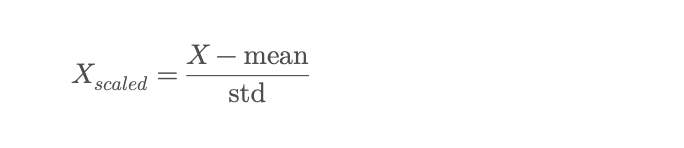
so that the mean becomes 0 and the standard deviation becomes 1.

We use standardization in kmeans so the clustering is not biased due to the different unit/scale of different features.

In [7]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(x_scaled)
labels = kmeans.labels_ #retrieves the cluster number assigned to each data point

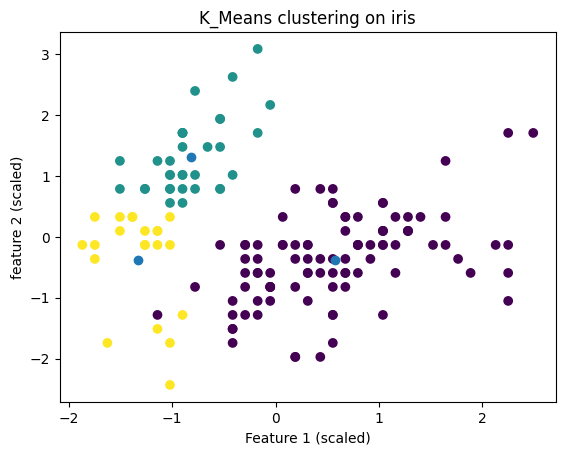

In [10]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
plt.title("K_Means clustering on iris")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("feature 2 (scaled)")
plt.show()

In [11]:
score = silhouette_score(x_scaled, labels)
print("Silhouette Score: ", score)

Silhouette Score:  0.4798814508199817


Silhouette score means how well the clusters are formed. It tells us how well separated and well grouped the clusters are.

Range of silhouette values - [-1,1].

+1 = perfect clustering, points are well separated

0 = borderline, clusters overlap

+1 = bad clustering, points assigned to wromg clusters

Silhouette score helps us to


*   decide if clustering is meaningful
*   compare cluster quality for different k values


*   avoid over/under clustering






In [12]:
pd.crosstab(y, labels, rownames=['true'], colnames = ['cluster'])

cluster,0,1,2
true,,,
0,0,33,17
1,46,0,4
2,50,0,0


The above code creates a cross - tabulation table, similar to confusion matrix.



*   true labels(y) vs
*   cluster labels assigned by kmeans

pd.crosstab() - creates a frequency(count) table.
y - true labels(actual classes)
rownames=['true'] - names the row header as true.
colnames=['cluster'] - names the column header as cluster.



*   true(0,1,2) - these are 3 as the iris data set has 3 classes(setosa, versicolor, virginca)




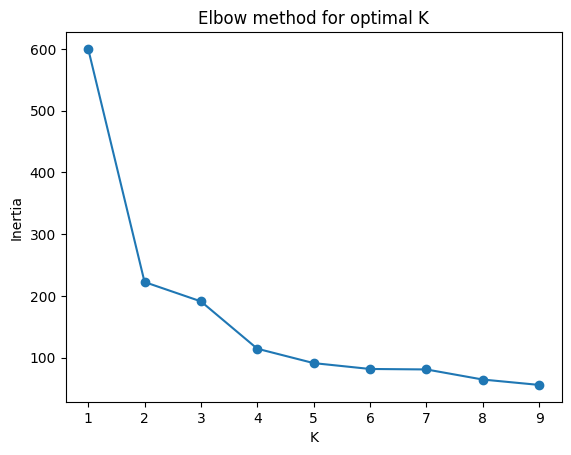

In [15]:
inertias = []
Ks = range(1,10) #trying different values of k(9 values)
for k in Ks:
  km=KMeans(n_clusters = k, random_state = 42)
  km.fit(x_scaled) #running kmeans clustering for each k
  inertias.append(km.inertia_) #storing inertia values

plt.plot(Ks, inertias, marker='o') #marker="o" draws a circle at each data points
plt.xlabel("K")
plt.ylabel('Inertia')
plt.title("Elbow method for optimal K")
plt.show()

The above code is used to find the optimal number of values of k, calculates inertia for each k and plots them.
Then we look for a 'bend' or an 'elbow' in the graph to choose the best k. The elbow point is the optimal k.

Inertia values in k-means show how sprad out the clusters points are(how far the data points are from their centre)
It is also called within - cluster sum of squares(WCSS)

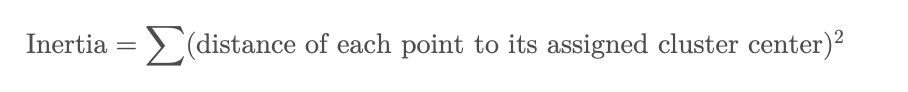

Lower Inertia - data points are tightly packed(better clustering)
higher Inertia - data is scattered(worse clustering)

